In [1]:
import pandas
import scipy
import sklearn
import keras
import tensorflow

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GroupKFold


keras.__version__

'3.0.5'

In [2]:
'''from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))'''

'from tensorflow.keras import backend as K\n\ndef root_mean_squared_error(y_true, y_pred):\n    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))'

In [3]:
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

dataset = pandas.read_csv(folder_path + '11-03-minmax_normalised_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'steps_per_hour', 'totalDistance', 'dwrTotalDuration', 'dist_per_hour', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'usual_wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'trouble_falling_asleep', 'time_falling_asleep', 'wake_ups', 'total_time_awake', 'total_minutes_asleep'])

# split into input (X) and output (Y) variables
X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'steps_per_hour', 'totalDistance', 'dwrTotalDuration', 'dist_per_hour', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'trouble_falling_asleep', 'time_falling_asleep', 'wake_ups', 'total_time_awake', 'total_minutes_asleep']].values
y = dataset['ssq_score'].values


In [4]:
gkf = GroupKFold(n_splits=5)

groups = dataset['participantId'].values

In [5]:
l1size = 3

In [6]:
print(len(X), len(y))


535 535


In [7]:
all_train_predictions = []
all_test_predictions = []

In [8]:


for train_idx, test_idx in gkf.split(X, y, groups):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = Sequential([
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    optm = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
    model.compile(optimizer=optm, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    history = model.fit(X_train, y_train, epochs=400, batch_size=1, validation_data=(X_test, y_test))

    predict_train = (model.predict(X_train) > 0.5).astype("int32")
    predict_test = (model.predict(X_test) > 0.5).astype("int32")

    all_train_predictions.append(predict_train)
    all_test_predictions.append(predict_test)

Epoch 1/400


388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0807 - root_mean_squared_error: 0.2832 - val_loss: 0.1218 - val_root_mean_squared_error: 0.3490
Epoch 2/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0676 - root_mean_squared_error: 0.2598 - val_loss: 0.0998 - val_root_mean_squared_error: 0.3158
Epoch 3/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0628 - root_mean_squared_error: 0.2503 - val_loss: 0.0834 - val_root_mean_squared_error: 0.2889
Epoch 4/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0582 - root_mean_squared_error: 0.2407 - val_loss: 0.0742 - val_root_mean_squared_error: 0.2724
Epoch 5/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0539 - root_mean_squared_error: 0.2312 - val_loss: 0.0878 - val_root_mean_squared_error: 0.2962
Epoch 6/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0646 - root_mean_squared_error: 0.2537 - val_loss: 0.0697 - val_root_mean_squared_error: 0.2640
Epoch 7/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - los

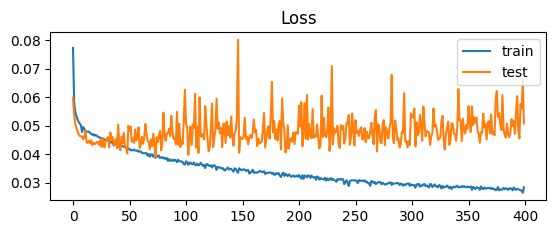

In [9]:
# plot loss during training
from matplotlib import pyplot


pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()



In [10]:
# plot loss during training

import matplotlib as plt


In [12]:
# print average RMSE as calculated by the loss function
print("Average RMSE: ", history.history['val_loss'][-1])

Average RMSE:  0.050791896879673004
